In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
from datetime import date
from sklearn import metrics
#pd.set_option('display.max_rows', 500)
#pd.set_option('display.max_columns', 500)
#pd.set_option('display.width', 1000)

In [58]:
df = pd.read_csv("car_data.csv")

In [66]:
df.head(100)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [61]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [62]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [63]:
for i in df:
    print(df[i].value_counts())
    print("   ")
    print("------------------------")

city                         26
corolla altis                16
verna                        14
fortuner                     11
brio                         10
i20                           9
innova                        9
ciaz                          9
grand i10                     8
Royal Enfield Classic 350     7
jazz                          7
amaze                         7
eon                           6
sx4                           6
ertiga                        6
i10                           5
swift                         5
alto k10                      5
dzire                         4
etios liva                    4
wagon r                       4
Royal Enfield Thunder 350     4
ritz                          4
Bajaj Pulsar 150              4
Bajaj Pulsar NS 200           3
etios cross                   3
TVS Apache RTR 160            3
Yamaha FZ S V 2.0             3
creta                         3
Honda CB Hornet 160R          3
etios g                       3
Bajaj Av

In [8]:
df.drop(["Car_Name"], axis = 1, inplace = True)

In [9]:
df.head(10)

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [10]:
todays_date = date.today()
  
print("Current date: ", todays_date)
  
#print("Current_year:", todays_date.year)
Current_year = todays_date.year

print("Current month:", todays_date.month)
print("Current day:", todays_date.day)

Current date:  2021-07-29
Current month: 7
Current day: 29


In [11]:
years = Current_year - df['Year']

In [12]:
print(years)

0       7
1       8
2       4
3      10
4       7
       ..
296     5
297     6
298    12
299     4
300     5
Name: Year, Length: 301, dtype: int64


In [13]:
df['years'] = years

In [14]:
df.drop(['Year'], axis=1, inplace=True)

In [15]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [16]:
df2 = pd.get_dummies(df, drop_first=True)

In [17]:
df2.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


<AxesSubplot:>

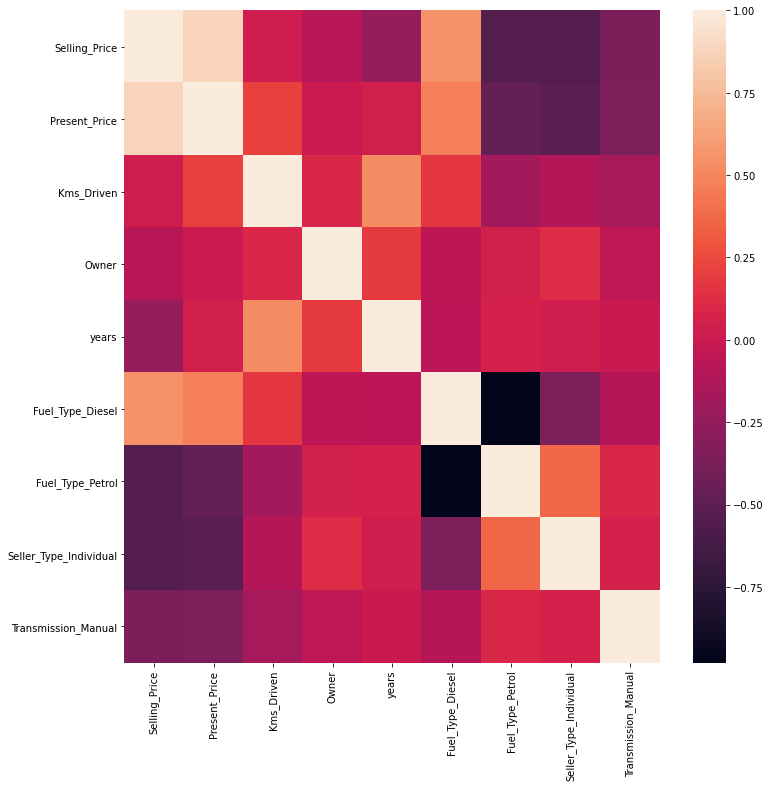

In [18]:
cor = df2.corr()
plt.figure(figsize=(12,12))
sns.heatmap(cor)

In [19]:
cor['Selling_Price'].sort_values(ascending=False)

Selling_Price             1.000000
Present_Price             0.878983
Fuel_Type_Diesel          0.552339
Kms_Driven                0.029187
Owner                    -0.088344
years                    -0.236141
Transmission_Manual      -0.367128
Fuel_Type_Petrol         -0.540571
Seller_Type_Individual   -0.550724
Name: Selling_Price, dtype: float64

In [20]:
'''for i in df2:    
    sns.jointplot(x=df2[i], y='Selling_Price', data=df2, kind='hex')'''

"for i in df2:    \n    sns.jointplot(x=df2[i], y='Selling_Price', data=df2, kind='hex')"

In [21]:
'''for feature in df2:
    df2[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()'''

'for feature in df2:\n    df2[feature].hist(bins=25)\n    plt.xlabel(feature)\n    plt.ylabel("Count")\n    plt.title(feature)\n    plt.show()'

In [22]:
'''def plot_box(df2, feature):
    plt.figure(figsize=(10,6))
    df2.boxplot(column=[feature])
    plt.show()
for columns in df2:
    plot_box(df2,columns)'''

'def plot_box(df2, feature):\n    plt.figure(figsize=(10,6))\n    df2.boxplot(column=[feature])\n    plt.show()\nfor columns in df2:\n    plot_box(df2,columns)'

In [23]:
df2.loc[df2['Present_Price']>=22,'Present_Price']=22
df2.loc[df2['Kms_Driven']>=100000,'Kms_Driven']=100000
df2.loc[df2['years']>=15,'years']=15

In [24]:
df3=df2.copy()

In [25]:
'''def plot_box(df3, feature):
    plt.figure(figsize=(10,6))
    df3.boxplot(column=[feature])
    plt.show()
for columns in df3:
    plot_box(df3,columns)'''

'def plot_box(df3, feature):\n    plt.figure(figsize=(10,6))\n    df3.boxplot(column=[feature])\n    plt.show()\nfor columns in df3:\n    plot_box(df3,columns)'

In [26]:
df3.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [27]:
'''from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
df3=pd.DataFrame(min_max.fit_transform(df3),columns=df3.columns)
df3.head()'''

'from sklearn.preprocessing import MinMaxScaler\nmin_max=MinMaxScaler()\ndf3=pd.DataFrame(min_max.fit_transform(df3),columns=df3.columns)\ndf3.head()'

In [28]:
'''from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df3=pd.DataFrame(scaler.fit_transform(df3), columns=df3.columns)'''

'from sklearn.preprocessing import StandardScaler\nscaler=StandardScaler()\ndf3=pd.DataFrame(scaler.fit_transform(df3), columns=df3.columns)'

In [29]:
df3.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [30]:
x=df3.drop(["Selling_Price"], axis=1)
y=df3["Selling_Price"]

In [31]:
x.head()

,Present_Price,Kms_Driven,Owner,years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,7,0,1,0,1
1,9.54,43000,0,8,1,0,0,1
2,9.85,6900,0,4,0,1,0,1
3,4.15,5200,0,10,0,1,0,1
4,6.87,42450,0,7,1,0,0,1


In [32]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [34]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test)

print('test_score', lr.score(x_test, y_test))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, lr_pred)))

test_score 0.8963975668610168
RMSE: 1.6182681196606088


In [35]:
from sklearn.ensemble import RandomForestRegressor
rfc =  RandomForestRegressor()
rfc.fit(x_train, y_train)
rfc_pred = rfc.predict(x_test)

print('test_score', lr.score(x_test, y_test))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, rfc_pred)))

test_score 0.8963975668610168
RMSE: 0.7105486572095501


In [36]:
from sklearn.tree import DecisionTreeRegressor
dtc = DecisionTreeRegressor()
dtc.fit(x_test, y_test)
dtc_pred = dtc.predict(x_test)

print('test_score', lr.score(x_test, y_test))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, dtc_pred)))

test_score 0.8963975668610168
RMSE: 0.0


In [37]:
from sklearn.model_selection import cross_validate
cv_results_rfc = cross_validate(rfc, x, y, cv=10, return_train_score=True)

In [38]:
rfc_test_average = np.average(cv_results_rfc['test_score'])
rfc_train_average = np.average(cv_results_rfc['train_score'])

In [39]:
print(rfc_test_average)
print(rfc_train_average)

0.2742372061581395
0.9764428718528695


In [40]:
df3.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [41]:
df3.head(10)

,Selling_Price,Present_Price,Kms_Driven,Owner,years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1
5,9.25,9.83,2071,0,3,1,0,0,1
6,6.75,8.12,18796,0,6,0,1,0,1
7,6.50,8.61,33429,0,6,1,0,0,1
8,8.75,8.89,20273,0,5,1,0,0,1
9,7.45,8.92,42367,0,6,1,0,0,1


In [42]:
testing = rfc.predict(x)
print(testing)

[ 3.7835  5.2935  7.7886  2.621   4.3995  7.8852  6.515   6.7505  7.2635
  7.061   2.932   7.0185  7.3258  5.985   2.3065  7.692   7.295   7.692
  3.2935  2.7005  2.8275  5.022   2.9075  2.519   2.934   2.939   3.5365
  5.6385  2.062   7.3415  3.1265  2.5275  5.0125  6.0735  5.731   3.028
  4.634   0.694   2.959   2.2905  5.8305  2.5655  2.064   5.6005  1.3215
  7.2931  2.904   1.483   5.82    7.6515 15.1285 22.333  15.8044 15.636
  2.6662  3.8696  4.5535  5.0635  4.045  20.941   7.295   4.8945 18.9815
 21.9545 30.354   4.5095 19.5217  9.633   4.575  13.9691  4.1215  4.9479
  7.083   2.7475  5.3265  4.038   5.7845  2.1501 11.2265 15.474  13.6161
  5.418  23.8555 11.5791  4.7431  4.2965 25.5745  5.9625  3.5855  3.959
  4.3345 10.2516  3.7866 22.333   6.6055  6.2975 21.4955 15.848   7.179
 10.0126  1.641   1.5955  1.578   1.5055  1.411   1.2899  2.5671  1.1845
  1.2045  1.1986  1.188   1.1695  1.185   1.1725  1.1473  1.1305  1.1021
  1.1282  1.1466  1.087   0.9258  1.0435  0.7883  1.0563

In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:
rfc_param = {'n_estimators':[10,15,20], 
            'min_samples_split':[8,16],
            'min_samples_leaf':[1,2,3,4,5]
            }

In [45]:
rfc_grid = GridSearchCV(estimator=rfc, 
                        param_grid=rfc_param,
                        cv=10,
                        n_jobs=-1,
                        return_train_score=True)

In [46]:
rfc_grid_fit = rfc_grid.fit(x, y)

In [47]:
rfc_grid.best_params_

{'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 20}

In [48]:
rfc_grid.best_score_

0.2967331343160652

In [49]:
predictions=rfc_grid.predict(x_test)

In [50]:
test_score = rfc_grid_fit.score(x_test, y_test)
train_score = rfc_grid_fit.score(x_test, y_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print(test_score)
print(train_score)

MAE: 0.34046775156662806
MSE: 0.26252804562888177
RMSE: 0.5123749072982416
0.9896140864427928
0.9896140864427928


In [51]:
df3.head(10)

,Selling_Price,Present_Price,Kms_Driven,Owner,years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1
5,9.25,9.83,2071,0,3,1,0,0,1
6,6.75,8.12,18796,0,6,0,1,0,1
7,6.50,8.61,33429,0,6,1,0,0,1
8,8.75,8.89,20273,0,5,1,0,0,1
9,7.45,8.92,42367,0,6,1,0,0,1


In [52]:
testing2 = rfc_grid.predict(x)
print(testing2)

[ 3.82753701  5.23456517  8.16054291  2.5415798   4.44194632  8.5344493
  6.68363309  6.77409936  8.09741827  7.43977399  2.83318643  7.38577345
  7.23256421  5.88726797  2.5623226   8.10835869  7.52076095  8.10835869
  3.34366869  2.82490693  2.91814476  5.23149248  3.52187715  2.20468407
  2.77142685  2.80138304  3.74930988  5.65409503  2.39443921  7.38577345
  3.48823832  2.66586598  5.07948629  6.2925284   5.62338828  3.29778965
  4.62780467  0.89931972  2.89968643  2.31952002  5.88122333  2.64699576
  2.36956466  5.60038828  1.20263411  7.15601187  2.98215452  2.39443921
  5.91503583  8.39616331 15.39972921 22.68268601 18.98835041 16.84229294
  2.7225789   3.93827127  4.52874217  4.33912842  4.38304913 21.70219018
  7.34766465  4.98102491 21.93440446 22.68268601 22.83464371  4.53767965
 18.5367625  15.09931647  4.90123006 15.75135059  4.33187608  4.22886074
  7.31458132  3.23030354  5.80980617  4.46471483  6.60880156  2.82278426
  8.91930357 15.39972921 12.30092063  5.04685825 22.

In [53]:
df2.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [70]:
Output_prediction = rfc_grid.predict([[30, 135000, 0, 8, 1, 0, 1, 1]])
print(Output_prediction)

[16.17633983]


In [55]:
import pickle
file = open('PRICE_PREDICTION.pkl', 'wb')

pickle.dump(rfc_grid_fit , file)